In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as npy
import pylab as py

from scipy.io import netcdf
import scipy.signal as si

from matplotlib.colors import LogNorm
%matplotlib inline

In [13]:
fdir = "/home/albert/Data/GPCP/"

pfile1 = fdir + 'GPCP_1DD_v1.2_1998-2010.nc'
pfile2 = fdir + 'GPCP_v12_precip_new_1998-2010.nc'


In [14]:
fprecip1 = netcdf.netcdf_file(pfile1,'r')
fprecip2 = netcdf.netcdf_file(pfile2,'r')


/home/albert/anaconda2/lib/python2.7/site-packages/scipy/io/netcdf.py:297: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [15]:
precip1 = fprecip1.variables['PREC']
precip2 = fprecip2.variables['Precip']

lat1 = fprecip1.variables['lat']
lon1 = fprecip1.variables['lon']
time = fprecip1.variables['time']

lat2 = fprecip2.variables['lat']
lon2 = fprecip2.variables['lon']


In [16]:
lat1a=lat1[:]
lon1a=lon1[:]
lat2a=lat2[:]
lon2a=lon2[:]
precip1a=precip1[:]
precip2a=precip2[:]
timea=time[:]

In [17]:
mask1=npy.equal(precip1a,-99999)
precip1m=npy.ma.array(precip1a,mask=mask1)
mask2=npy.equal(precip2a,-99999)
precip2m=npy.ma.array(precip2a,mask=mask2)


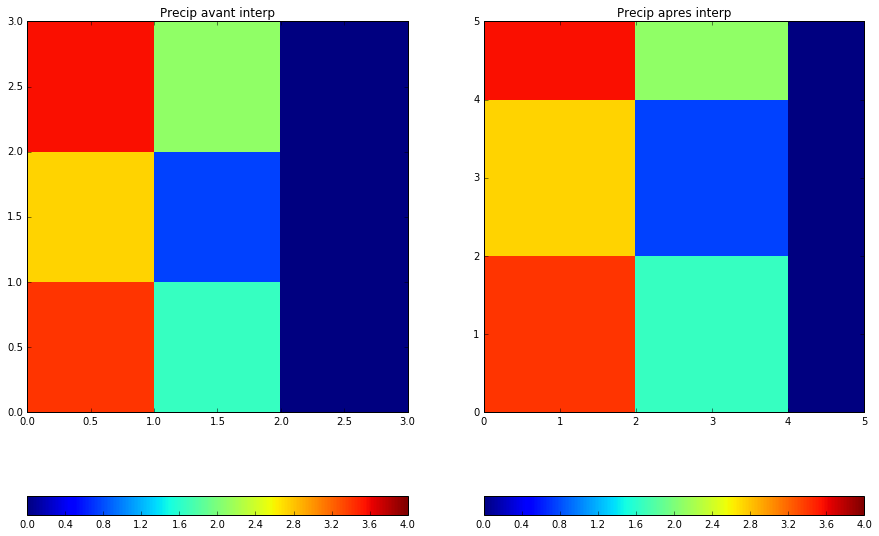

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.pcolor(precip1m[0,39:42,9:12],vmin=0,vmax=4)
plt.colorbar(orientation='horizontal')
plt.title('Precip avant interp')

plt.subplot(1,2,2)
plt.pcolor(precip2m[0,79:84,19:24],vmin=0,vmax=4)
plt.colorbar(orientation='horizontal')
plt.title('Precip apres interp')


In [20]:
print(npy.count_nonzero(precip1m[:,39,9]))
print(npy.count_nonzero(precip2m[:,79,19]))
print(npy.count_nonzero(precip2m[:,80,19]))
print(npy.count_nonzero(precip2m[:,81,19]))
print(npy.count_nonzero(precip1m[:,40,9]))


2595
2595
2595
2582
2582


In [21]:
def number_wet_days(lat,lon,time,precip):
    wet=npy.zeros((len(lat),len(lon)))
    intens=npy.zeros((len(lat),len(lon)))

    data_wet=npy.zeros((len(time),len(lat),len(lon)))
    data_wet[:]=precip[:]

    for i in npy.arange(0,len(lat),1):
        if npy.abs(lat[i])<50:
            for j in npy.arange(0,len(lon),1):
                r = 0
                for k in npy.arange(0,len(time),1):
                    if precip[k,i,j] <= 0.0:
                        data_wet[k,i,j] = 0.0
                    else:
                        r = r+1
                if r<>0.:
                    wet[i,j] = r/float(len(time)) * 100.
                    intens[i,j] = sum(data_wet[:,i,j])/r
    return wet,intens

In [22]:
wet1,intens1=number_wet_days(lat1a,lon1a,timea,precip1a)
wet2,intens2=number_wet_days(lat2a,lon2a,timea,precip2a)

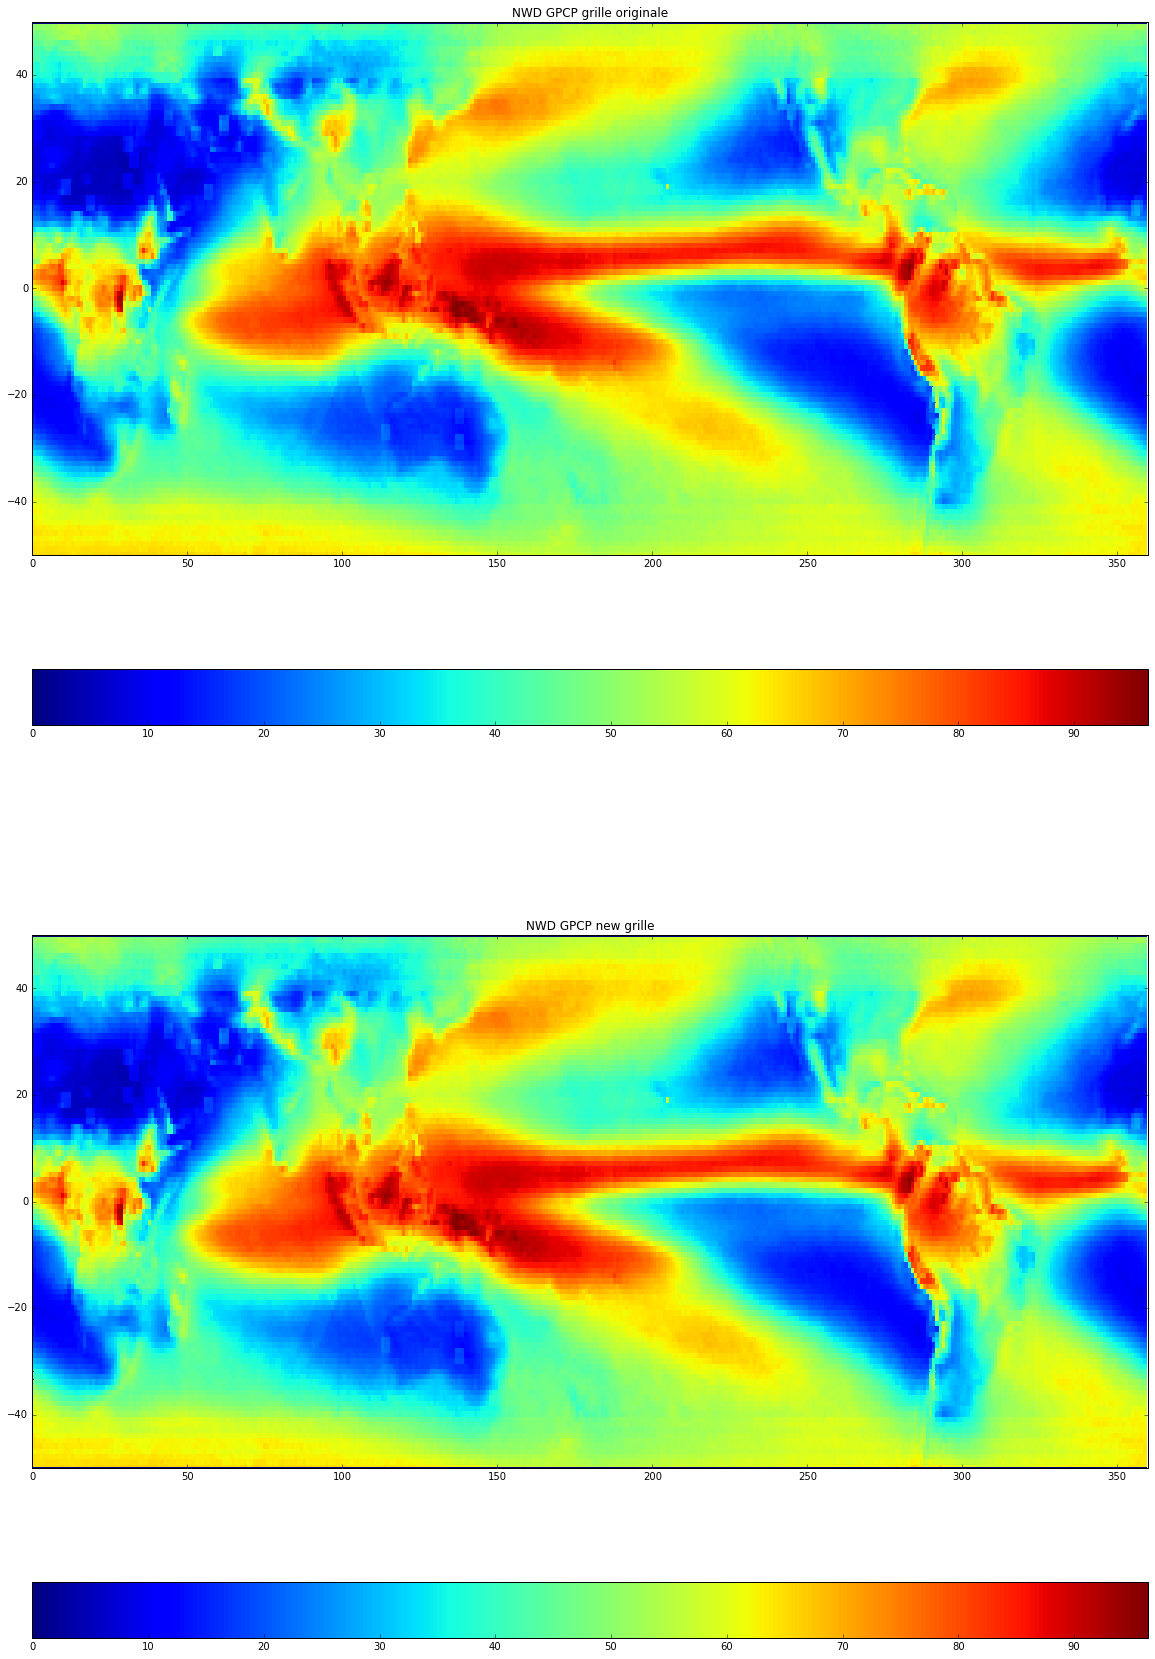

In [24]:
lon2D1, lat2D1 = npy.meshgrid(lon1a, lat1a)
lon2D2, lat2D2 = npy.meshgrid(lon2a, lat2a)
                  
plt.figure(figsize=(20,30))
plt.subplot(2,1,1)
plt.pcolor(lon2D1, lat2D1,wet1)
plt.axis([0, 360, -50, 50])
plt.colorbar(orientation='horizontal')
plt.title('NWD GPCP grille originale')
plt.subplot(2,1,2)
plt.pcolor(lon2D2, lat2D2,wet2)
plt.axis([0, 360, -50, 50])
plt.colorbar(orientation='horizontal')
plt.title('NWD GPCP new grille')

plt.savefig('/home/albert/Data/GPCP/PLOTS/cartes_NWD_new.png')

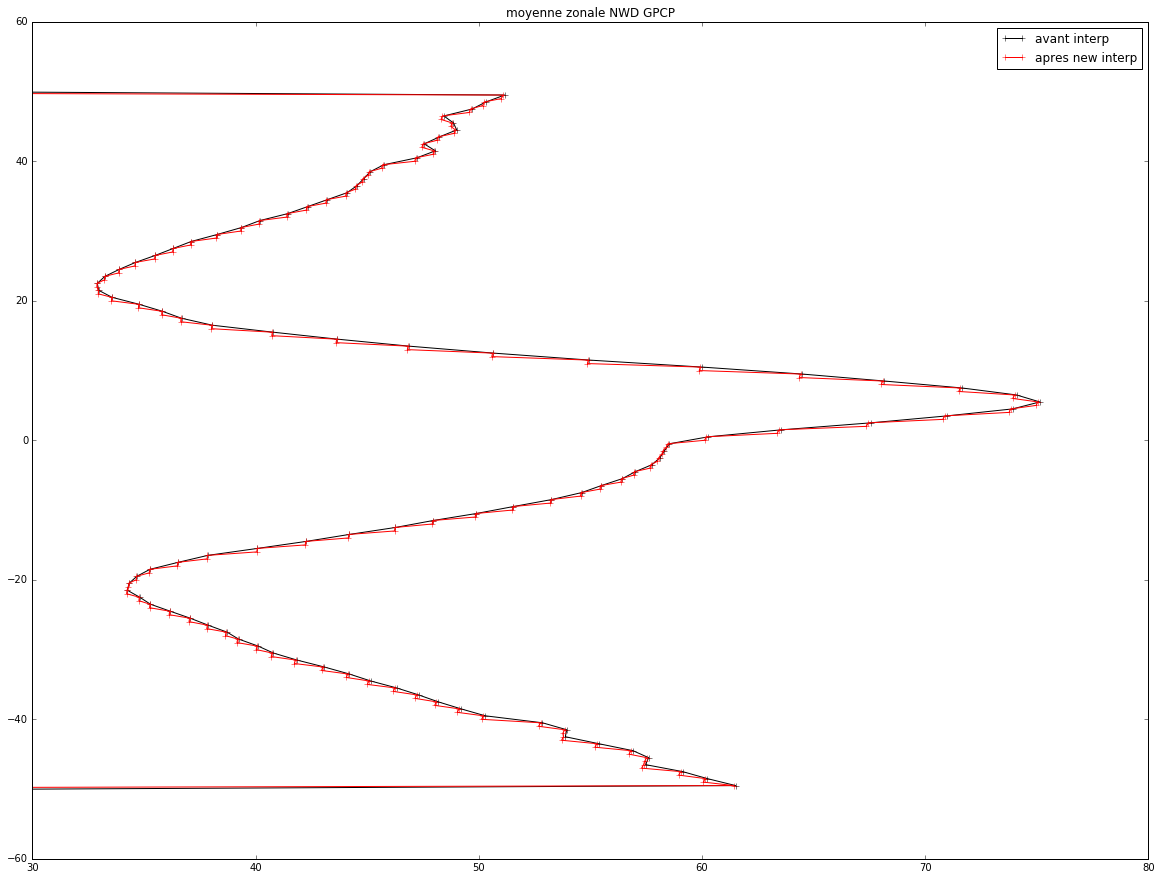

In [25]:
zonal1=npy.mean(wet1,1)
zonal2=npy.mean(wet2,1)

plt.figure(figsize=(20,15))
plt.plot(zonal1,lat1a,'k-+')
plt.plot(zonal2,lat2a,'r-+')
plt.axis([30, 80, -60, 60])
plt.legend(('avant interp','apres new interp'))
plt.title('moyenne zonale NWD GPCP')
plt.savefig('/home/albert/Data/GPCP/PLOTS/moyenne_zonale_new.png')

[30, 80, 40, 50]

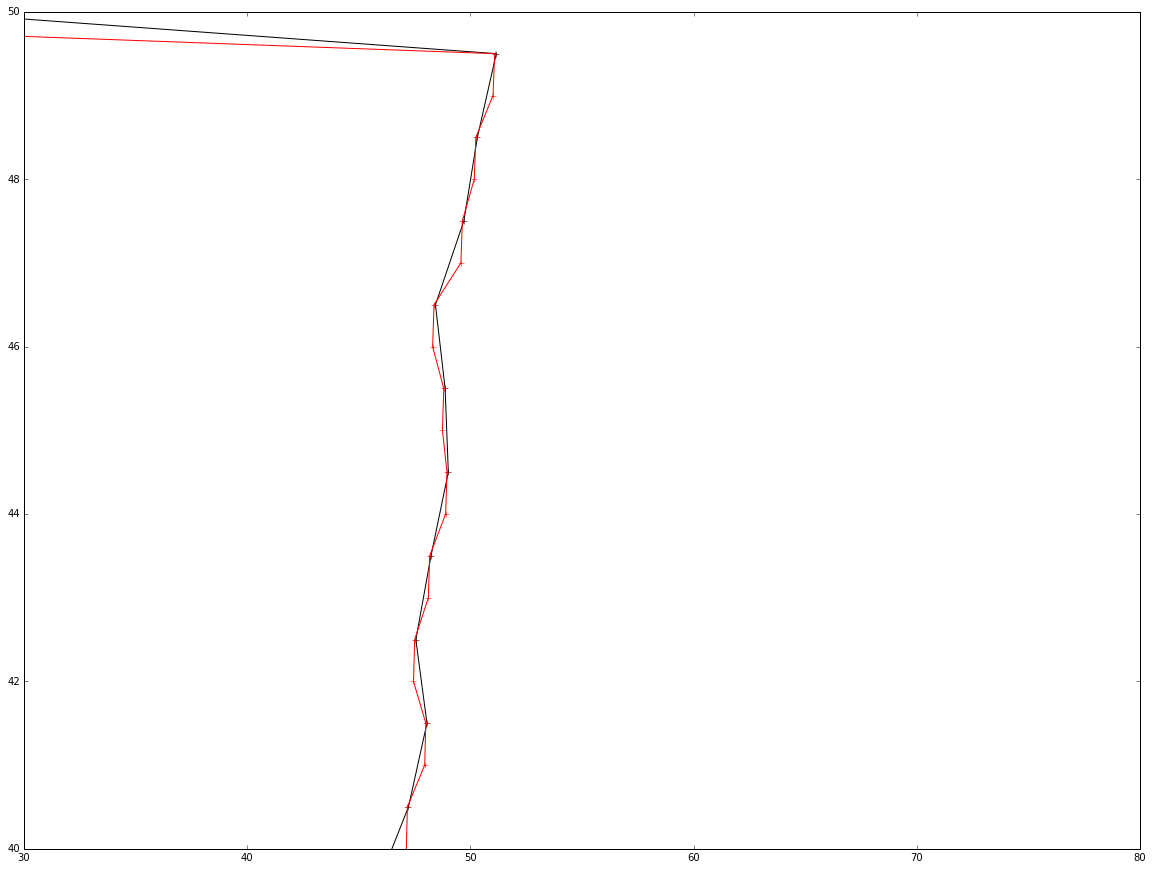

In [23]:
zonal1=npy.mean(wet1,1)
zonal2=npy.mean(wet2,1)

plt.figure(figsize=(20,15))
plt.plot(zonal1,lat1a,'k-+')
plt.plot(zonal2,lat2a,'r-+')
plt.axis([30, 80, 40, 50])


In [21]:
print(lat1a[41])
print(lat2a[83])
print(lat1a[42])
print(lat2a[85])
print(lon1a[11])
print(lon2a[23])
print(lat2a[84])


48.5
48.5
47.5
47.5
11.5
11.5
48.0


[0, 20, 35, 65]

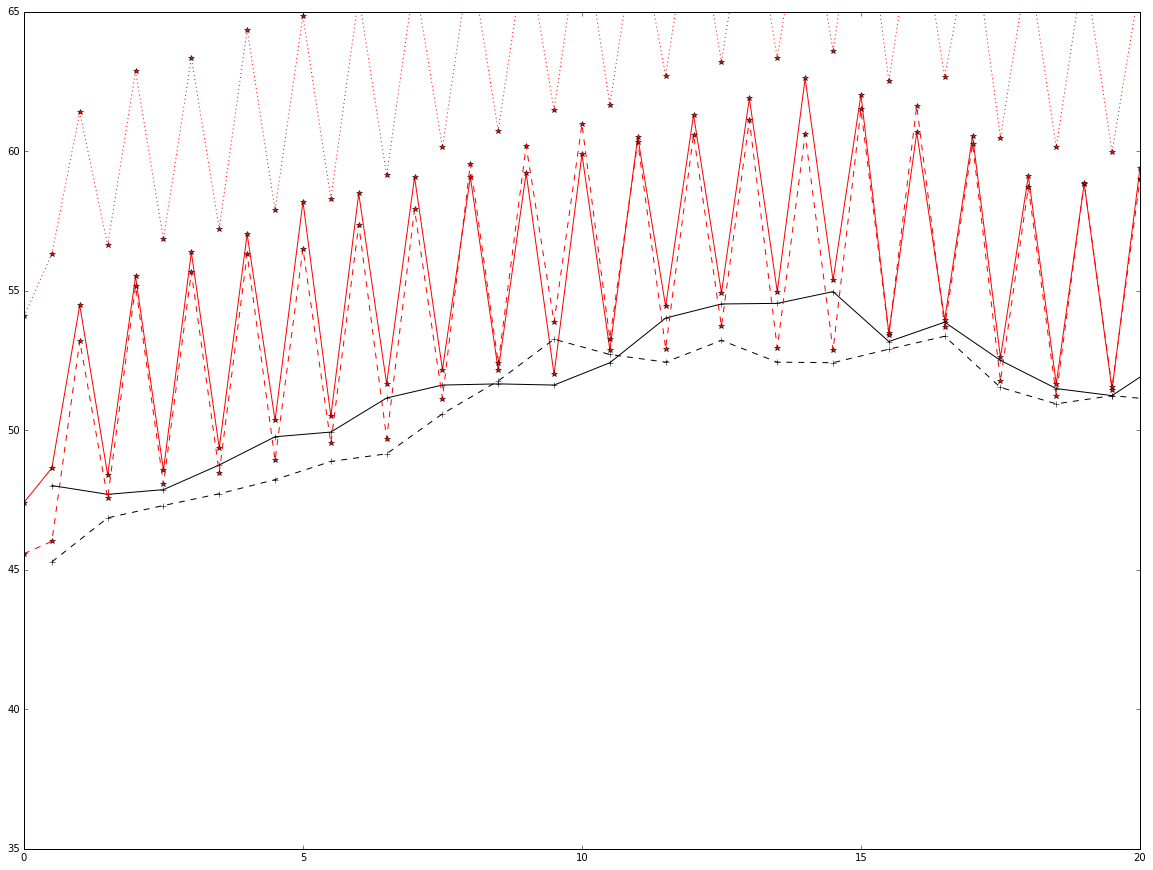

In [149]:
plt.figure(figsize=(20,15))
plt.plot(lon1a,wet1[41,:],'k-+')
plt.plot(lon2a,wet2[83,:],'r-*')
plt.plot(lon1a,wet1[42,:],'k--+')
plt.plot(lon2a,wet2[85,:],'r--*')
plt.plot(lon2a,wet2[84,:],'r:*')
plt.axis([0, 20, 35, 65])


[ 50.5  50.   49.5  49.   48.5]
[  9.5  10.   10.5  11.   11.5]
[ 50.5  49.5  48.5]
[  9.5  10.5  11.5]
[[  0.           0.           0.        ]
 [ 53.51727043  53.98062342  53.18028644]
 [ 51.62173547  52.42207245  54.02274642]]
[[  0.           0.           0.           0.           0.        ]
 [ 61.71019377  54.27548441  61.49957877  53.49620893  60.61499579]
 [ 68.15501264  61.45745577  68.55518113  62.40522325  68.78685762]
 [ 59.8989048   52.88542544  60.50968829  54.44397641  61.31002527]
 [ 68.32350463  61.66807077  68.17607414  62.70008425  69.20808762]]
[[3.4138309955596924 1.6656055450439453 0.0]
 [2.7398841381073 0.7604634165763855 0.0]
 [3.56425142288208 2.0958027839660645 0.0]]
[[ 2.    1.03  0.3   0.    0.05]
 [ 1.71  0.76  0.16  0.    0.  ]
 [ 2.25  1.42  0.49  0.    0.  ]
 [ 2.92  2.1   0.81  0.    0.  ]
 [ 3.98  2.67  1.67  0.91  0.44]]


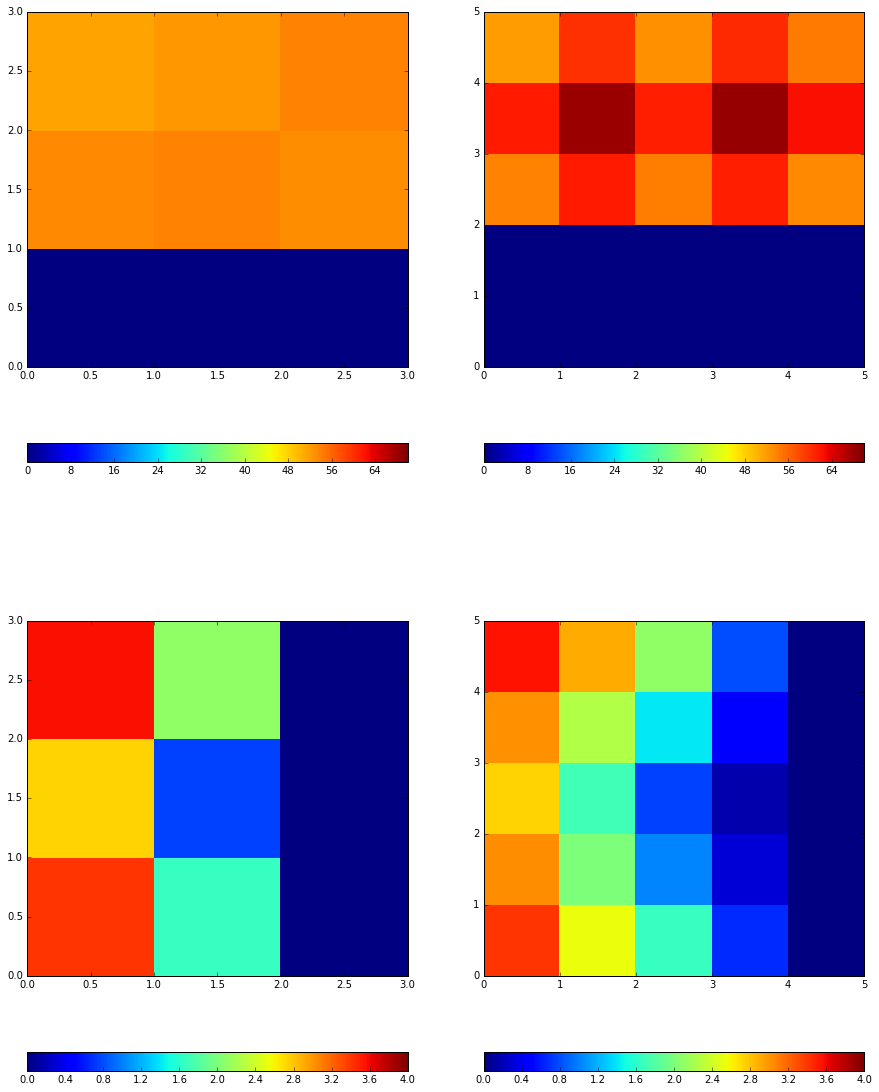

In [72]:
print(lat2[79:84])
print(lon2[19:24])
print(lat1[39:42])
print(lon1[9:12])

print(wet1[39:42,9:12])
print(wet2[80:85,20:25])
print(precip1m[0,39:42,9:12])
print(precip2a[0,80:85,20:25])

plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
plt.pcolor(wet1[39:42,9:12],vmin=0,vmax=70)
plt.colorbar(orientation='horizontal')

plt.subplot(2,2,2)
plt.pcolor(wet2[79:84,19:24],vmin=0,vmax=70)
plt.colorbar(orientation='horizontal')

plt.subplot(2,2,3)
plt.pcolor(precip1m[0,39:42,9:12],vmin=0,vmax=4)
plt.colorbar(orientation='horizontal')

plt.subplot(2,2,4)
plt.pcolor(precip2a[0,79:84,19:24],vmin=0,vmax=4)
plt.colorbar(orientation='horizontal')


50.5
9.5
50.5
9.5
[0.0038309955596922407 0.004951934814453551 -0.00047309875488288355 0.0
 -0.0038938522338867188 -0.004025802612305007 -0.0015027809143068893 0.0
 0.004945068359375027 0.0 0.0 0.0 -0.0024762916564942117 0.0
 0.0015949344635011187 -0.0032080650329593396 0.0 -0.0035472106933589487
 -0.002674255371093892 0.004168887138366717 0.0 0.0 0.0
 -0.0035010147094727273 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 -0.0013899636268616122 -8.648395538335407e-05 0.0018056106567381214 0.0
 -0.0038603687286377086 -0.004738187789917081 0.0045800304412839665 0.0
 -0.0020598340034484464 -0.003767766952514684 -0.004656365364789963 0.0 0.0
 0.0 0.0032751077413558927 -0.004243450164794993 0.0 0.0031598281860349964
 -0.003857059478759778 0.0 0.0027733260393142667 -0.0008090686798096769 0.0
 -0.004814367294311506 -0.0024936103820802913 0.004806976318359801
 -0.004242553710937624 -0.003766479492188779 -0.004625444412231339 0.0 0.0
 0.0 -0.0017996501922605823 0.0 0.0 0.0 0.003408541679382

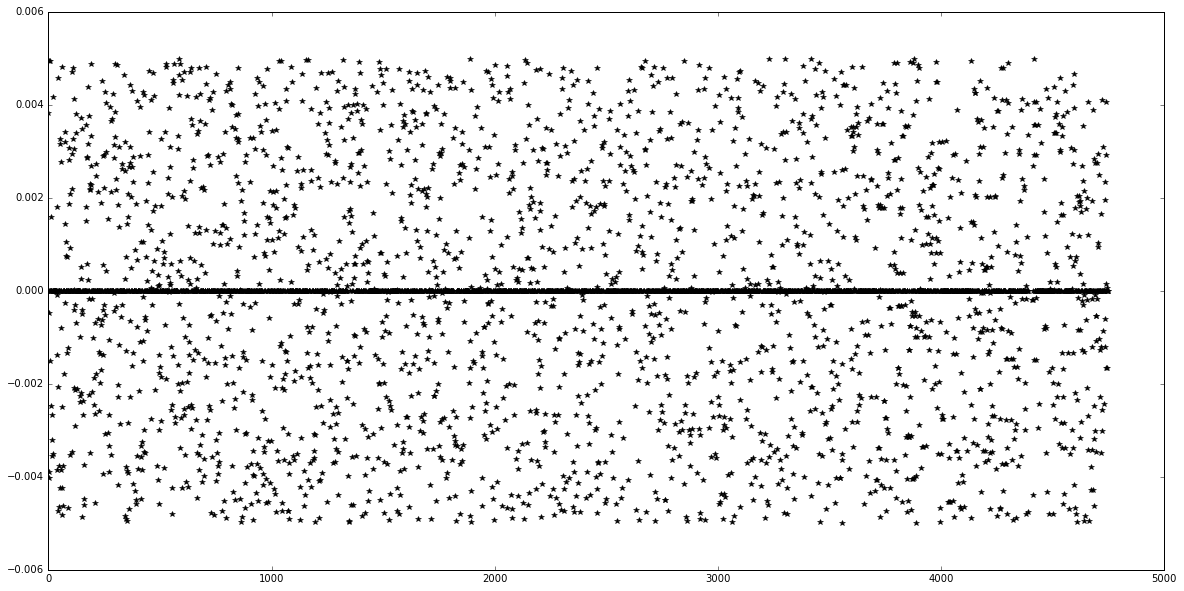

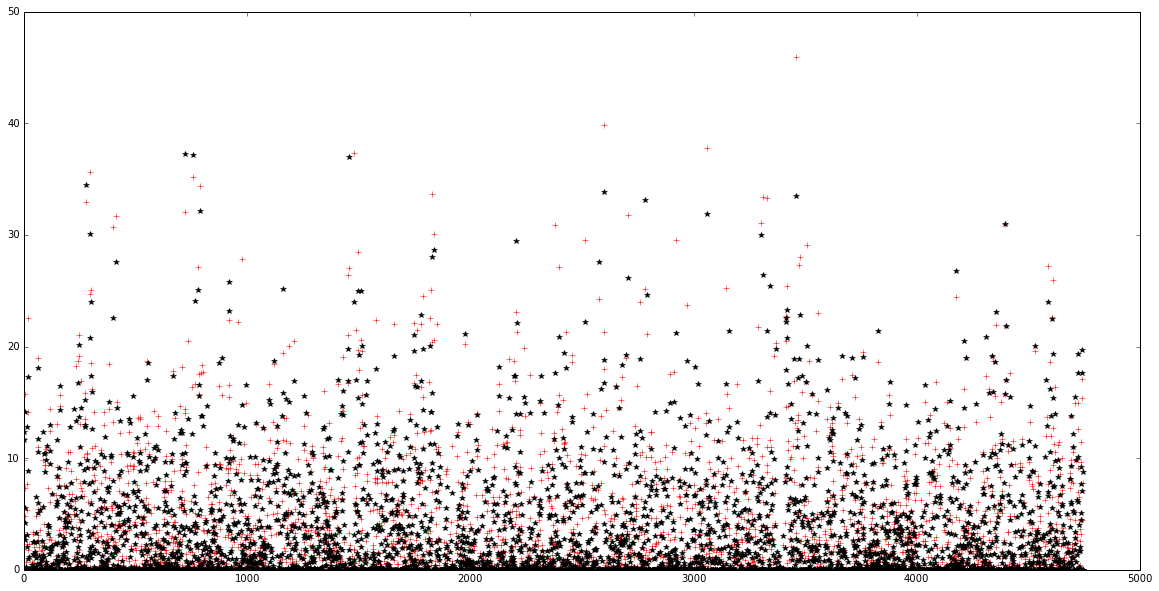

In [87]:
print(lat2[79])
print(lon2[19])
print(lat1[39])
print(lon1[9])

plt.figure(figsize=(20,10))
#plt.plot(precip1m[:,39,9],'b*')
#plt.plot(precip2a[:,79,19],'r+')
plt.plot(precip1m[:,39,9]-precip2a[:,79,19],'k*')
diff=precip1m[:,39,9]-precip2a[:,79,19]
print(diff[0:100])

plt.figure(figsize=(20,10))
plt.plot(precip2a[:,79,19],'r+')
plt.plot(precip2a[:,80,19],'k*')



2565
2954
2559
500.82
459.83
1104


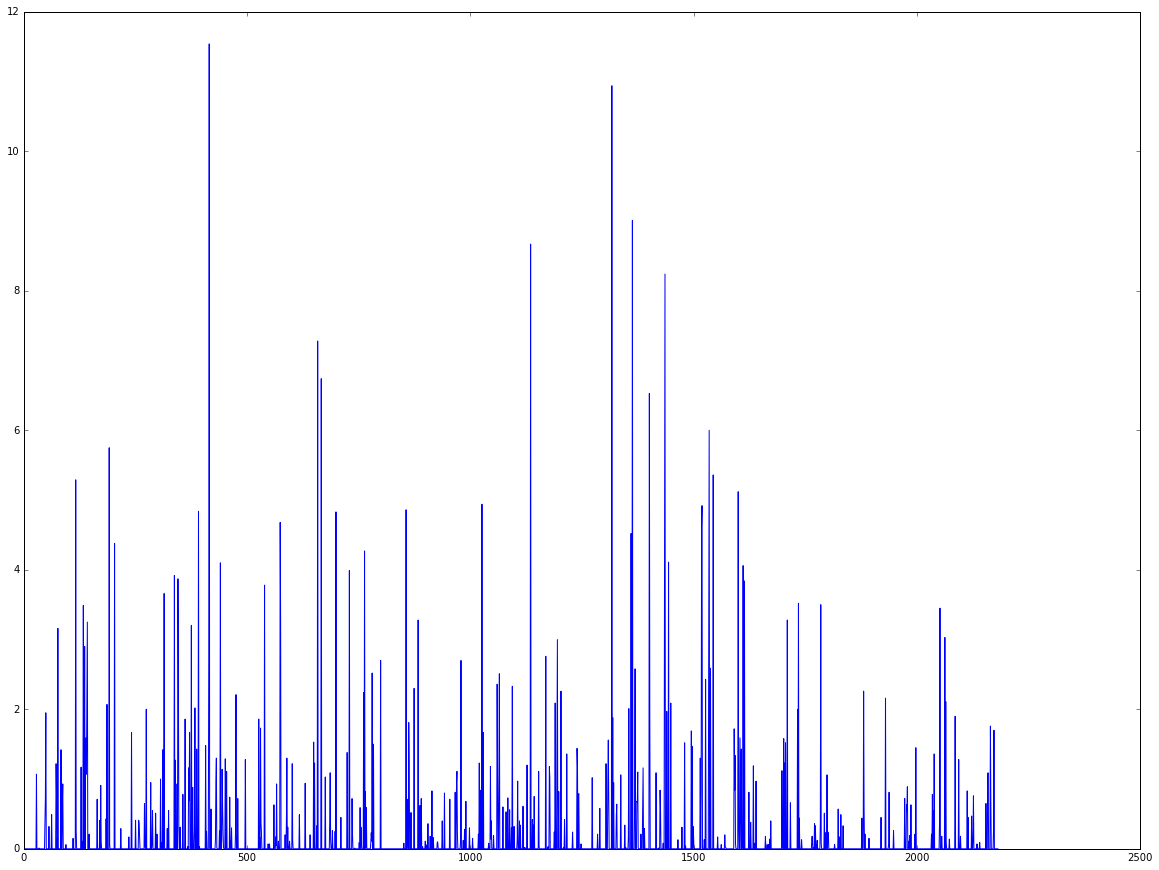

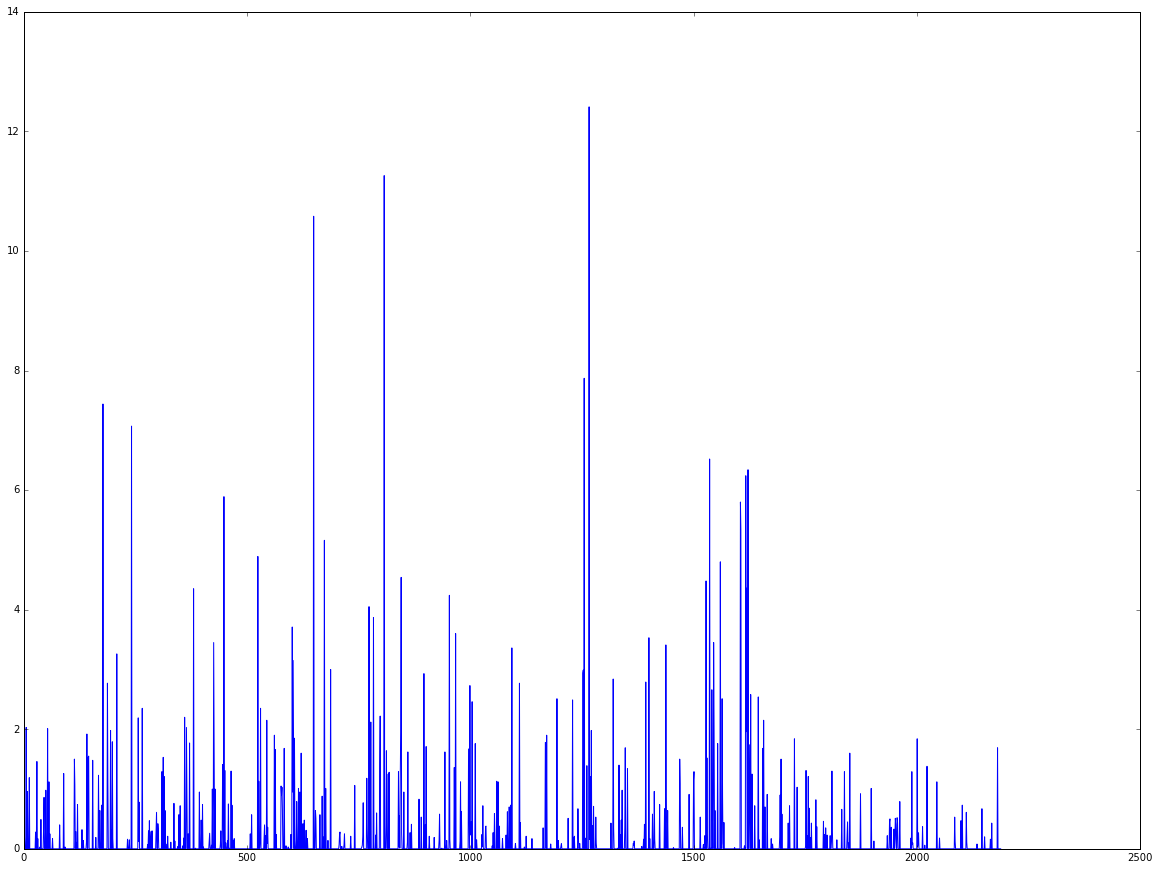

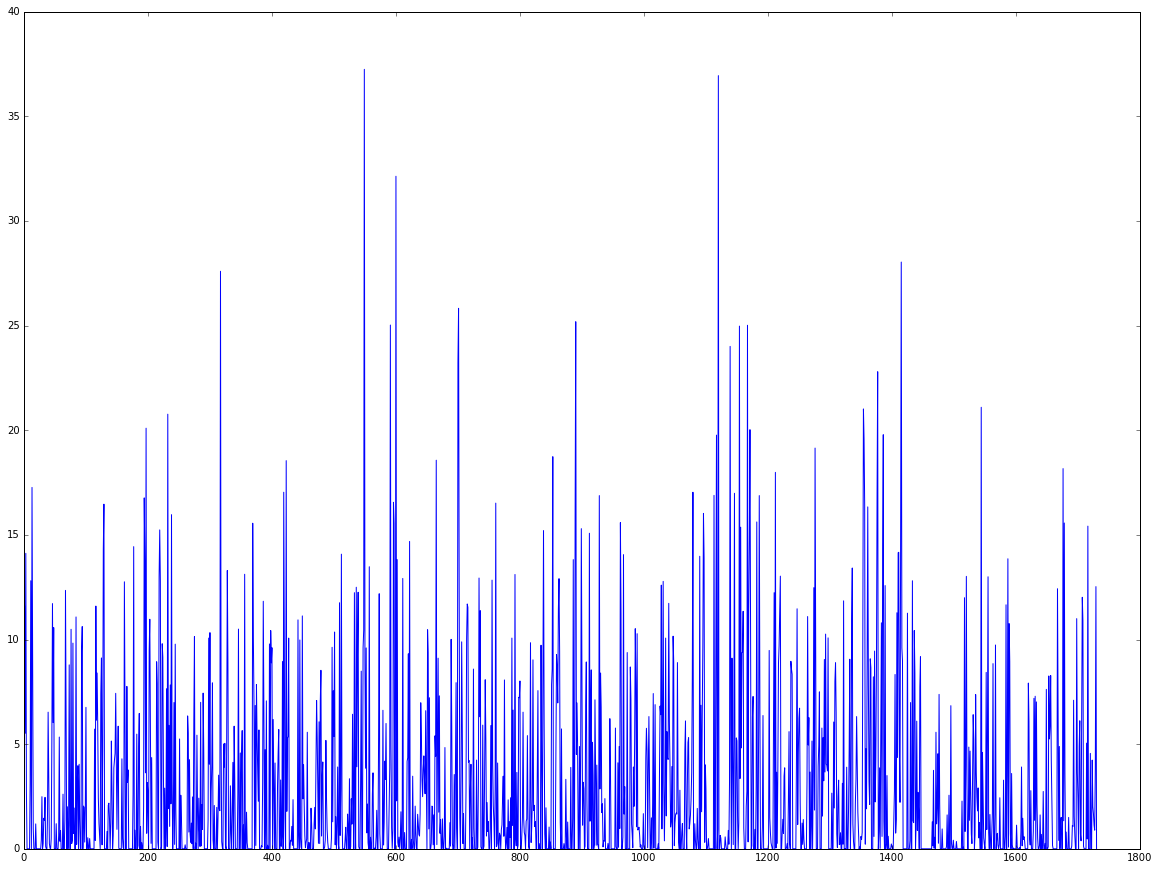

In [139]:
t1=precip2a[:,79,19]
t2=precip2a[:,80,19]
t3=precip2a[:,81,19]
print(npy.count_nonzero(npy.array(t1)))
print(npy.count_nonzero(npy.array(t2)))
print(npy.count_nonzero(npy.array(t3)))

print(npy.sum(t2[npy.where(t1==0.)]))

plt.figure(figsize=(20,15))
plt.plot(t2[npy.where(t1==0.)])

print(npy.sum(t2[npy.where(t3==0.)]))

plt.figure(figsize=(20,15))
plt.plot(t2[npy.where(t3==0.)])

print(npy.count_nonzero(npy.array(t2[npy.where(t1[npy.where(t3==0.)]==0.)])))

plt.figure(figsize=(20,15))
plt.plot(t2[npy.where(t1[npy.where(t3==0.)]==0.)])


[0, 300, 0, 60]

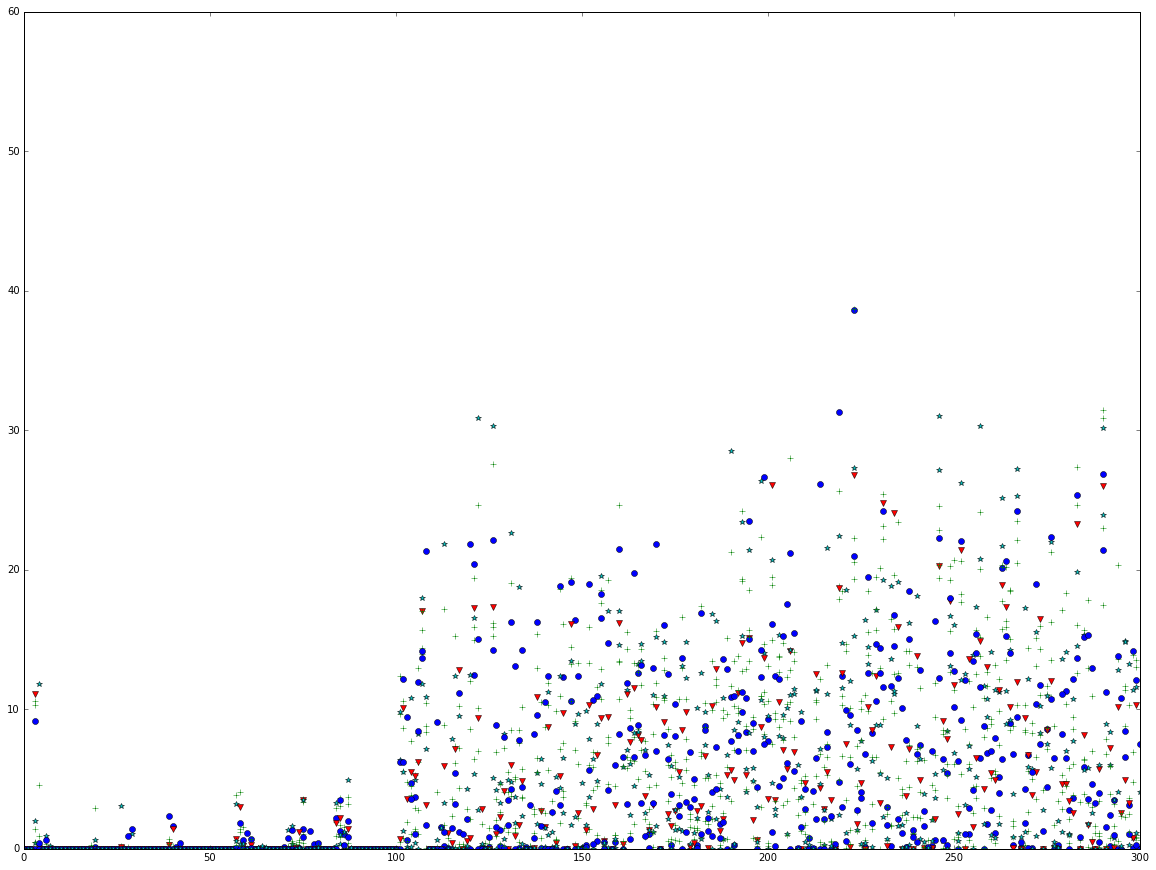

In [39]:
plt.figure(figsize=(20,15))
plt.plot(precip1a[:,81,21],'c*')
plt.plot(precip1a[:,82,21],'g+')
plt.plot(precip1a[:,83,21],'bo')
plt.plot(precip1a[:,81,22],'g+')
plt.plot(precip1a[:,82,22],'rv')
plt.plot(precip1a[:,83,22],'g+')
plt.plot(precip1a[:,81,23],'bo')
plt.plot(precip1a[:,82,23],'g+')
plt.plot(precip1a[:,83,23],'c*')
plt.axis([0, 300, 0, 60])

In [46]:
precip1s=0.*precip1a
precip2s=0.*precip2a
precip1s[npy.where(precip1a>0.)]=1
precip2s[npy.where(precip2a>0.)]=1


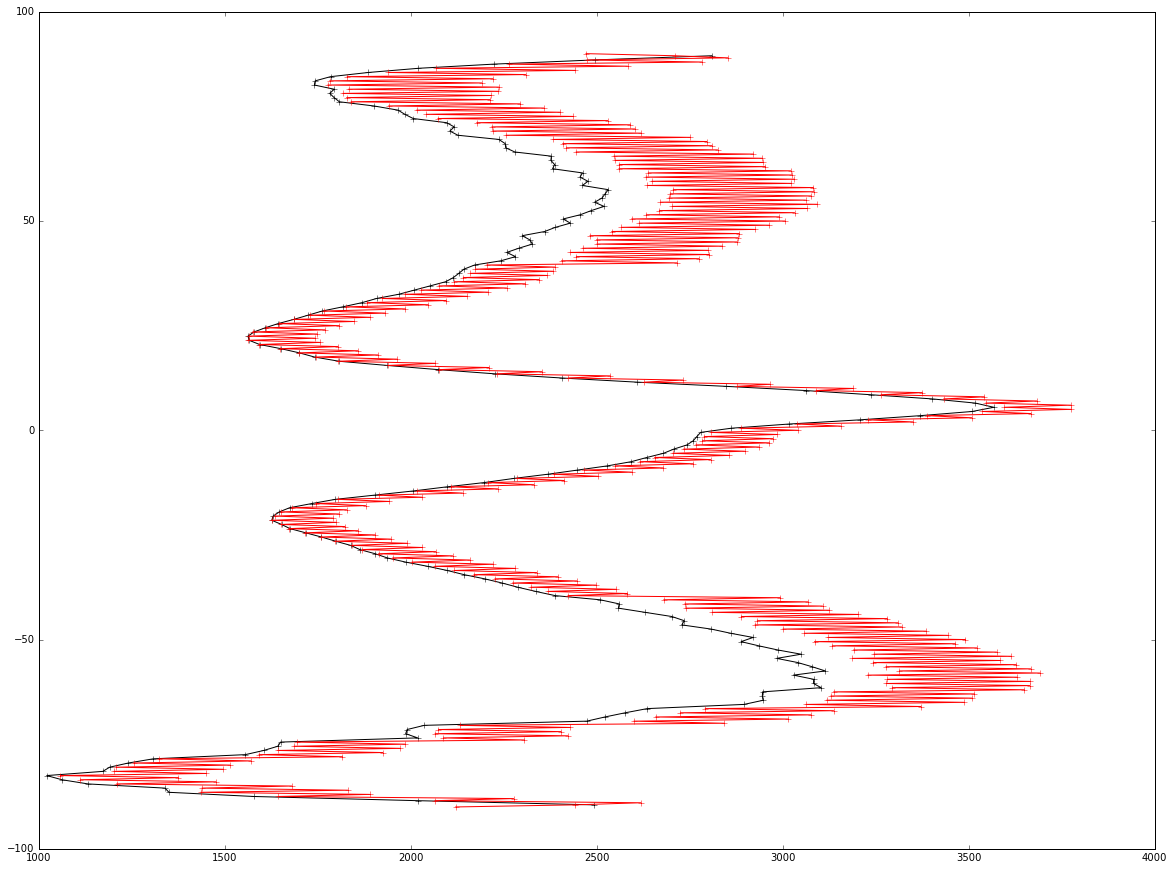

In [53]:
pzonal1=npy.mean(npy.sum(precip1s,0),1)
pzonal2=npy.mean(npy.sum(precip2s,0),1)

plt.figure(figsize=(20,15))
plt.plot(pzonal1,lat1a,'k-+')
plt.plot(pzonal2,lat2a,'r-+')
#plt.axis([30, 80, 40, 50])


In [52]:
truc=npy.sum(precip1s,0)
precip1s.shape

(4748, 180, 360)

[100, 110, -1, 2]

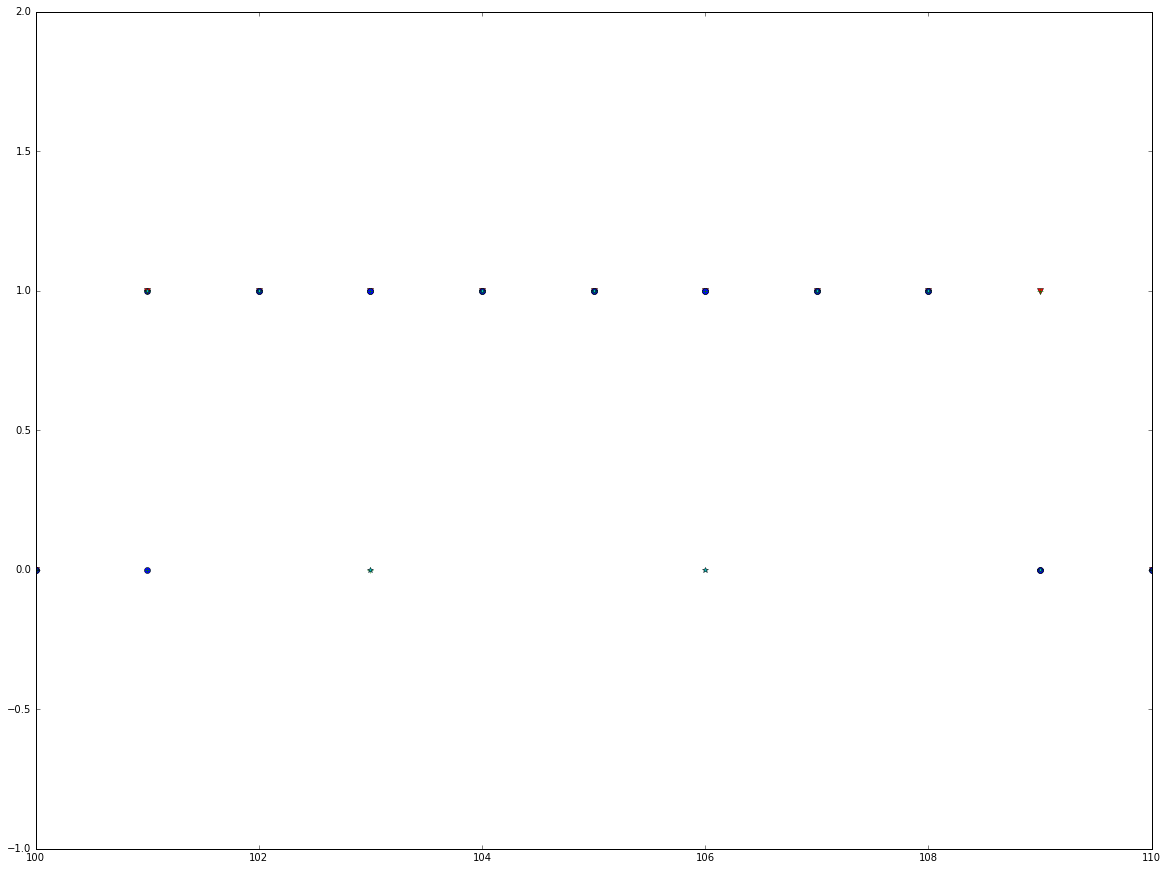

In [49]:
plt.figure(figsize=(20,15))
plt.plot(precip1s[:,81,21],'c*')
plt.plot(precip1s[:,82,21],'g+')
plt.plot(precip1s[:,83,21],'bo')
plt.plot(precip1s[:,81,22],'g+')
plt.plot(precip1s[:,82,22],'rv')
plt.plot(precip1s[:,83,22],'g+')
plt.plot(precip1s[:,81,23],'bo')
plt.plot(precip1s[:,82,23],'g+')
plt.plot(precip1s[:,83,23],'c*')
plt.axis([100, 110, -1, 2])